In [2]:
import pandas as pd 

#read dataset
df = pd.read_csv("Spotify Youtube Dataset.csv")

#display first examples
df.head()

#Dropping features from the dataset that add no predictive value to the model
df = df.drop(columns=[
    'Track', 'Artist', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description', 'Album', 'Album_type'])

#Sanity check and dropping duplicates
df = df.drop_duplicates()

#Check for missing data
print("NULL data: ",df.isnull().sum())

# Drop rows with missing target features
df = df.dropna(subset=['Views'])

# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_wo_views = [c for c in numeric_cols if c != 'Views']
df[numeric_cols_wo_views] = df[numeric_cols_wo_views].fillna(df[numeric_cols_wo_views].median())

# Fill categorical/boolean columns with mode
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Create popularity classes based on quantiles
df['popularity_class'] = pd.qcut(df['Views'], q=3, labels=['Low', 'Medium', 'High'])

# Drop the original 'views' column (to avoid leakage of target)
df = df.drop(columns=['Views'])

NULL data:  Unnamed: 0            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64


C:\Users\lesha\AppData\Local\Temp\ipykernel_15032\4110758838.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


1.0


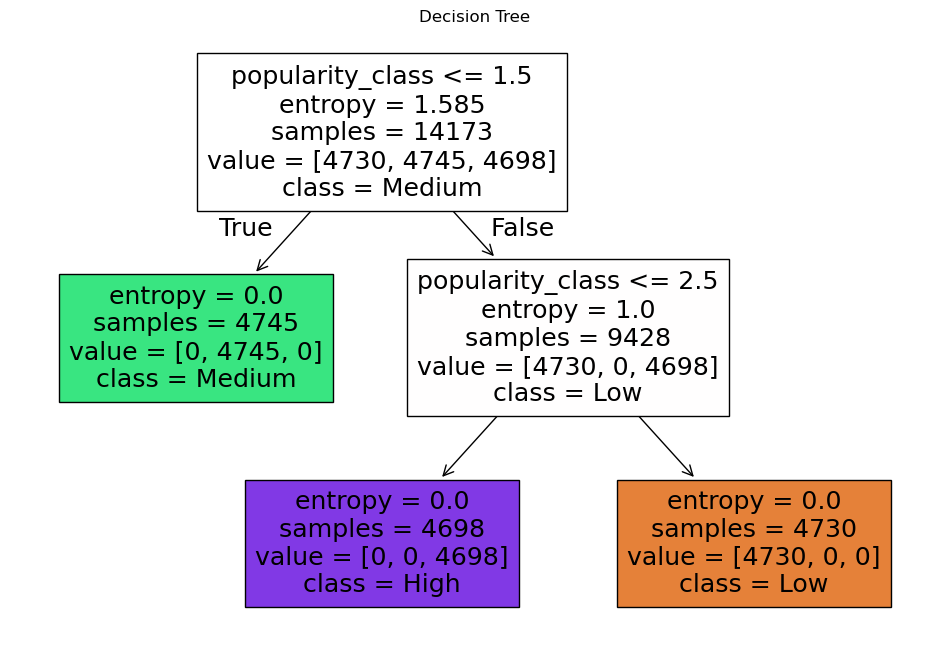

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import category_encoders as ce
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

# Spliting the data 
X = df.drop(columns=['Likes', 'Comments', 'Stream'], axis=1)
y = df['popularity_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Categorial encoder for the popularity class 
encoder = ce.OrdinalEncoder(['popularity_class'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Decision Tree Classifier 
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# Display the decision tree
plt.figure(figsize= (12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=y.cat.categories.astype(str), filled=True)
plt.title("Decision Tree")
plt.show()

